### YOUNG PEOPLE SURVEY - EMPATHY PREDICTION

In [99]:
import pandas as pd
import numpy as np
from sys import argv
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm, grid_search
from sklearn.feature_selection import RFE
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


def readData(data_file_path, columns_file_path):
    df = pd.read_csv(data_file_path)
    df_features = pd.read_csv(columns_file_path)
    return df

df = readData('Data/responses.csv', 'Data/columns.csv')
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow




<br>

## PRE - PROCESSING

Pre-processing steps involve replacing null/missing values in Numeric features (except for Empathy feature) values by the most frequently occuring numeric value in that particular column.

Categorical features that have null/missing values are handled by deleting that particular row. All the rows in the Empathy column which have null values are also deleted.

<br>



In [79]:
def preProcess(data):
    print('Imputing numeric data - imputing missing values with most frequent values except for Empathy column....')
    print()
    numerical_columns = data._get_numeric_data().columns.values
    index, = np.where(numerical_columns == 'Empathy')
    numerical_columns = np.delete(numerical_columns, index)
    numeric_imputer = Imputer(strategy='most_frequent')
    data[numerical_columns] = numeric_imputer.fit_transform(data[numerical_columns])
    columns = data.columns.values
    series_nan = data.isnull().any()
    print('Columns having null data after imputing numeric values are: ')
    for column in columns:
        if(series_nan[column] == True):
            print(column)
    print()
    print('Dropping rows which have null values... ')
    data = data.dropna(how='any')
    print()
    print('Final Dimension of data is : ', data.shape)
    return data


df = preProcess(df)

Imputing numeric data - imputing missing values with most frequent values except for Empathy column....

Columns having null data after imputing numeric values are: 

Dropping rows which have null values... 

Final Dimension of data is :  (971, 150)



<br>

## VISUALIZATION OF RELATIONSHIPS

<ul>
<li> In this step, visualized realtionship between: </li>
    <ul>
    <li> Age, Gender and Empathy </li>
    <li> Happiness in life, Education and Empathy </li>
    <li> Village/town residents and Empathy </li>
    <li> Gender and Empathy </li>
    <li> Correlation between randomly selected features </li>
    </ul>
</ul>
<br>



Relationship between age, gender and empathy: 


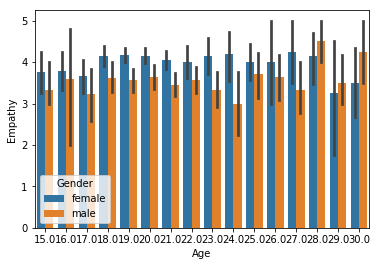


Relationship between Happiness in life, Education and empathy: 


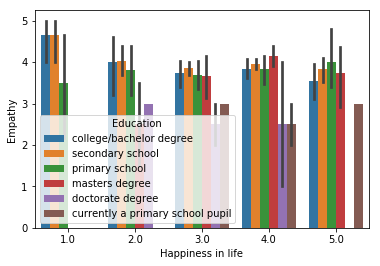


Analyzing the relationship between village/town residents and empathy


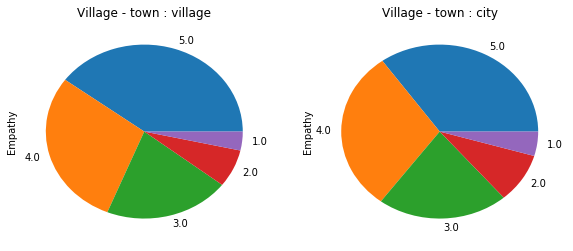

Analyzing the relationship between gender and empathy


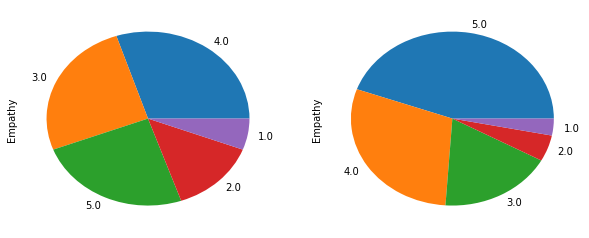

Left pie chart shows emapthy in men and the right pit char shows empathy in women


Visualize correlation between some features: 



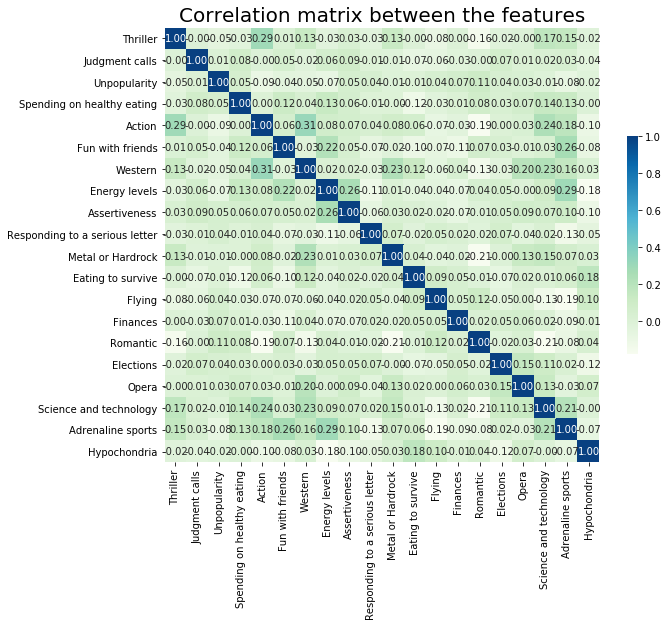

In [82]:
def visualizeRelations(data):
    print()
    print('Relationship between age, gender and empathy: ')
    sns.barplot(x="Age", y="Empathy", hue="Gender", data=data)
    plt.show()
    
    print()
    print('Relationship between Happiness in life, Education and empathy: ')
    sns.barplot(x="Happiness in life", y="Empathy", hue="Education", data=data)
    plt.show()
    
    print()
    print('Analyzing the relationship between village/town residents and empathy')
    
    fig = plt.figure(figsize=(15,4))
    i = 1
    for lr in data['Village - town'].unique():
        fig.add_subplot(1, 3, i)
        plt.title('Village - town : {}'.format(lr))
        data.Empathy[data['Village - town'] == lr].value_counts().plot(kind='pie')
        i += 1
    plt.show()
    
    print('Analyzing the relationship between gender and empathy')
    pie = plt.figure(figsize=(10,4))
    pie.add_subplot(121)
    data.Empathy[data['Gender'] == 'male'].value_counts().plot(kind='pie')
    pie.add_subplot(122)
    data.Empathy[data['Gender'] == 'female'].value_counts().plot(kind='pie')
    plt.show()
    print('Left pie chart shows emapthy in men and the right pit char shows empathy in women')

    
    print()
    print()
    print('Visualize correlation between some features: ')
    print()
    correlation_matrix = data[data.columns.to_series().sample(20)].corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.show()
    print()
    
visualizeRelations(df)

<br>

## Encoding of Categorical Features

Encoding categorical data - Performing Label encoding on categorical features which have two values e.g. Only child has values yes or no and encoding other categorical features using One Hot Encoding

(reasoning behind this - performing label encoding on such features will prevent blow up feature space and also to avoid dummy trap)


<br>


In [14]:

##Based on above observation we can use label encoding on Only child, Village - town, House - Block of flats, 
#Left - right handed as these feature can be encoded using 0's and 1's and to prevent blow up of feature space

def EncodeCategoricalData(data):
    categorical_data = data.select_dtypes(include=['object'])
    for column in categorical_data.columns:
        data[column] = pd.Categorical(data[column])
    category_data = data.select_dtypes(include=['category'])
    print()
    print('Displaying categorial data with various labels and the number of occurences: ')
    for columns in category_data.columns:
        print()
        print(category_data[columns].value_counts(dropna=False))
        print("--------------------------------------------------------")
    
    print()
    print('Encoding Categorical Features....')
    features_to_encode = ['Only child','Gender', 'Village - town', 'House - block of flats', 'Left - right handed']
    df_encoded = data
    for feature in features_to_encode:
        df_encoded[feature] = LabelEncoder().fit_transform(data[feature])
    
    df_encoded = pd.get_dummies(df_encoded, columns = list(set(category_data.columns) - set(features_to_encode)))
    print()
    print('Categorial features have been encoded')
    print()
    print('printing a summary of the encoded data :')
    print()
    print(df_encoded.head())
    return df_encoded

df_encoded = EncodeCategoricalData(df)


Displaying categorial data with various labels and the number of occurences: 

tried smoking     417
never smoked      203
current smoker    180
former smoker     171
Name: Smoking, dtype: int64
--------------------------------------------------------

social drinker    641
drink a lot       210
never             120
Name: Alcohol, dtype: int64
--------------------------------------------------------

i am always on time        386
i am often early           315
i am often running late    270
Name: Punctuality, dtype: int64
--------------------------------------------------------

sometimes                        526
only to avoid hurting someone    262
everytime it suits me            135
never                             48
Name: Lying, dtype: int64
--------------------------------------------------------

few hours a day            717
less than an hour a day    134
most of the day            117
no time at all               3
Name: Internet usage, dtype: int64
--------------------

## SPLITTING THE DATA - TRAIN / TEST

Extracted all the processed columns except for Empathy in X (feature set) and stored Empathy in Y (labels). 

Further divided the data into training set (80%) and test set (20%)

</br>

In [83]:
def getTrainTest(data):
    print()
    print('Splitting the data further into train/test...')
    X = data[data.loc[:, data.columns != 'Empathy'].columns]
    Y = data['Empathy']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 25)
    return X, Y, X_train, X_test, y_train, y_test

X, Y, X_train, X_test, y_train, y_test = getTrainTest(df_encoded)


Splitting the data further into train/test...


<br>
## PLOTTING THE LEARNING CURVE

Plotting the learning score to observe the trend of Training Set Size and the Accuracy Score, The Training accuracy score reduces as the training set size is increase (observation - not overfitting). The cross-validation score increases as the training set size is increased (observation - model generalizes)

<br>

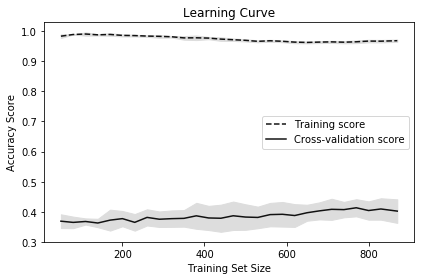

In [101]:
def plotLearningCurve(X, Y):
    train_sizes, train_scores, test_scores = learning_curve(SVC(kernel = 'rbf'), 
                                                        X, Y,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1, 
                                                        train_sizes=[50, 80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500, 530, 560, 590, 620, 650, 680, 710, 740, 770, 800, 830, 870])

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")

    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    
plotLearningCurve(X, Y)

<br>
## VISUALIZATION OF TOP 15 FEATURES

Visualizing the correlation between top 15 featurs to observe the realtionship between these features

<br>


Visualize correlation between top 15 features in Training data: 



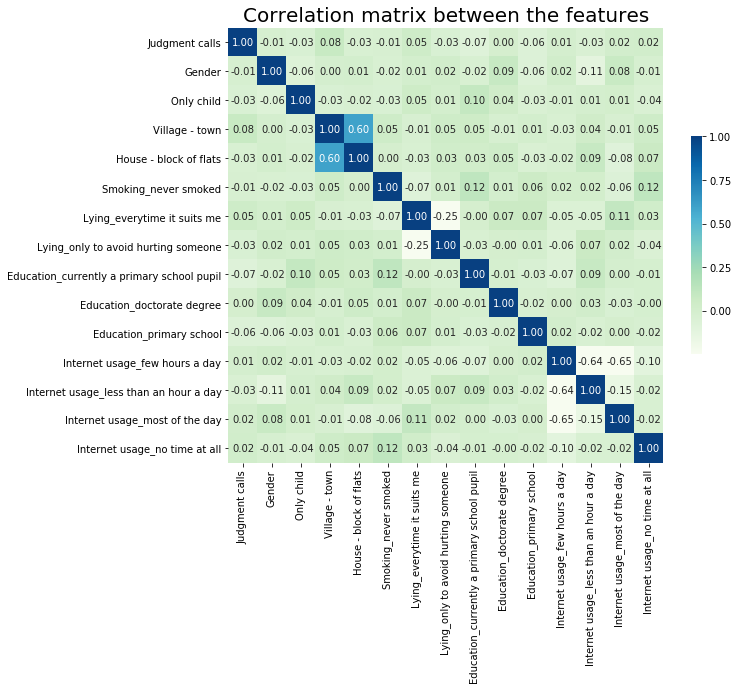

In [85]:
def visualizeTopFeatures(X_train, y_train):
    logreg = LogisticRegression()
    rfe = RFE(logreg, 15)
    rfe = rfe.fit(X_train, y_train)
    inclusion = rfe.support_
    cols = X_train.columns.values
    X_train_selected = pd.DataFrame()
    X_train = X_train.reset_index(drop=True)
    for i in range(0, len(inclusion)):
        if(inclusion[i] == True):
            X_train_selected[cols[i]] = X_train[cols[i]].copy()
    print()
    print('Visualize correlation between top 15 features in Training data: ')
    print()
    correlation_matrix = X_train_selected.corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.show()
    
visualizeTopFeatures(X_train, y_train)

## FEATURE SELECTION

Feature selections helps to determine which features aid the learning of the model. If many important features are given to the model to learn the model will learn well and give accurately predictions during testing or when it is deployed. 

Using PCA - Principal Component Analysis for feature reduction and selection of features (with maximum variance)

<br>

In [89]:
# Trying PCA - Works the best for feature selection

def doFeatureSelection(X_train,X_test):
    print()
    print('Selecting features by using Principal Component Analysis...')
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(0.88)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train_scaled)
    X_test_transformed = pca.transform(X_test_scaled)
    return X_train_transformed, X_test_transformed

X_train_selected, X_test_selected = doFeatureSelection(X_train,X_test)


Selecting features by using Principal Component Analysis...


## CONFUSION MATRIX

Confusion matrix aids in observing how well/ poor the classifier performs. Confusion matrix can help us realize which data points are classified incorrectly.


In [100]:
def plotConfusionMatrix(cnf_matrix, classifier_name):
    print('Plotting the confusion matrix to observe which data points are incorrectly classified')
    print()
    ax= plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix for {}'.format(classifier_name)); 
    ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5']);
    plt.show()

## TRAINING AND TESTING VARIOUS CLASSIFIERS

Different classifiers give different results (classification results), training and testing various classifier helps to determine which classifier performs the best.

<br>


In [91]:
def classifier_train_predict(X_train, y_train, X_test, y_test) :
    print()
    print('Running various classifiers to predict the labels of the test data...')
    classifiers = {
        "Baseline Classifier": DummyClassifier(strategy='most_frequent', random_state=0),
        "Logistic Regression": LogisticRegression(),
        "Linear SVM": SVC(),
        "Non Linear SVM": SVC(kernel='rbf'),
        "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Neural Network": MLPClassifier(alpha = 1),
        "Naive Bayes": GaussianNB(),
        "Decision tree" : DecisionTreeClassifier(criterion='entropy'),
        "Kernelized SVM" : SVC(decision_function_shape='ovo'),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost" : XGBClassifier()
    }
   
    for i in classifiers :
        clf = classifiers[i]
        clf = clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        print()
        print (i," Accuracy Score: ",accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        print()
        plotConfusionMatrix(cnf_matrix, i)
        

In [92]:
def votingClassifier(X_train, y_train, X_test, y_test):
    clf1 = RandomForestClassifier(n_estimators=50)
    clf2 = SVC(kernel = 'rbf')
    clf3 = SVC()
    
    print()
    print('Voting Classifier with hard voting:')
    vote_model = VotingClassifier(estimators=[('Random', clf1), ('kernelized', clf2), ('SVC', clf3)], voting='hard')
    vote_model.fit(X_train,y_train)
    y_pred = vote_model.predict(X_test)
    print()
    print("Accuracy Score of Voting Classifier: ",accuracy_score(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    plotConfusionMatrix(cnf_matrix, 'voting classifier')


Running various classifiers to predict the labels of the test data...

Baseline Classifier  Accuracy Score:  0.38461538461538464

Plotting the confusion matrix to observe which data points are incorrectly classified



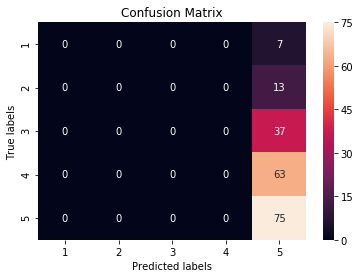


Logistic Regression  Accuracy Score:  0.4666666666666667

Plotting the confusion matrix to observe which data points are incorrectly classified



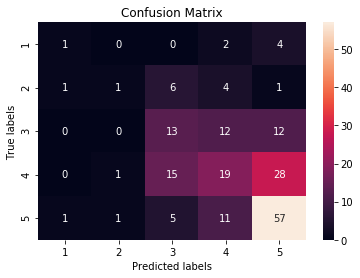


Linear SVM  Accuracy Score:  0.5230769230769231

Plotting the confusion matrix to observe which data points are incorrectly classified



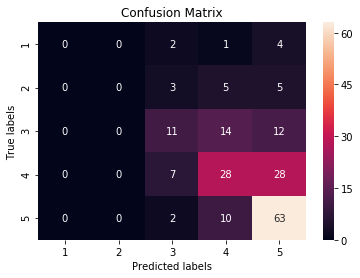


Non Linear SVM  Accuracy Score:  0.5230769230769231

Plotting the confusion matrix to observe which data points are incorrectly classified



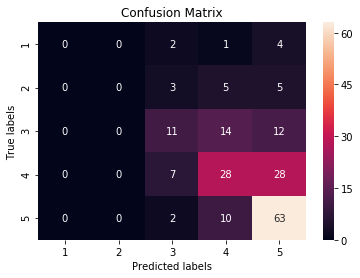


Gradient Boosting Classifier  Accuracy Score:  0.46153846153846156

Plotting the confusion matrix to observe which data points are incorrectly classified



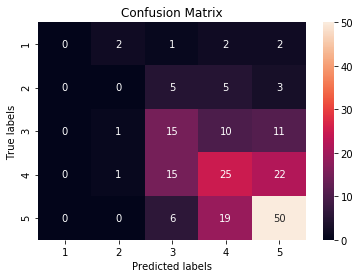


Decision Tree  Accuracy Score:  0.31794871794871793

Plotting the confusion matrix to observe which data points are incorrectly classified



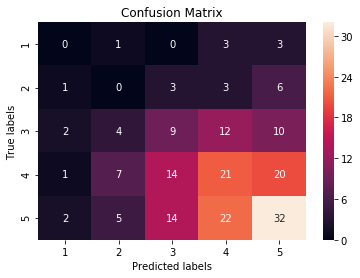


Random Forest  Accuracy Score:  0.4256410256410256

Plotting the confusion matrix to observe which data points are incorrectly classified



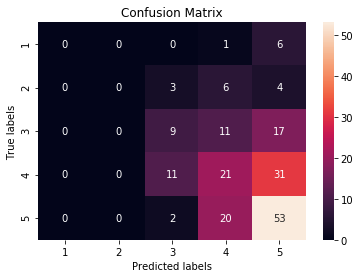


Neural Network  Accuracy Score:  0.41025641025641024

Plotting the confusion matrix to observe which data points are incorrectly classified



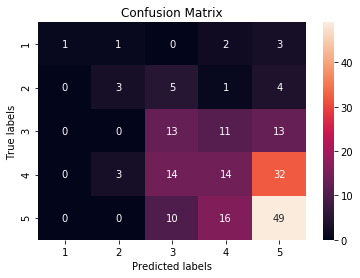


Naive Bayes  Accuracy Score:  0.47692307692307695

Plotting the confusion matrix to observe which data points are incorrectly classified



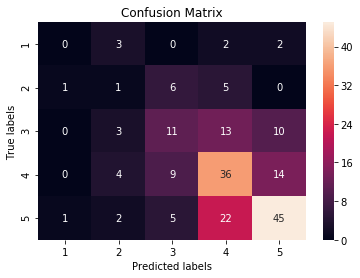


Decision tree  Accuracy Score:  0.2512820512820513

Plotting the confusion matrix to observe which data points are incorrectly classified



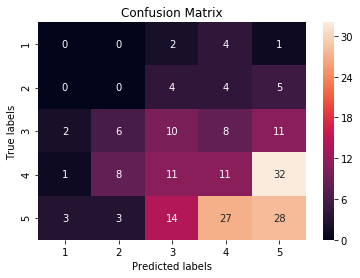


Kernelized SVM  Accuracy Score:  0.5230769230769231

Plotting the confusion matrix to observe which data points are incorrectly classified



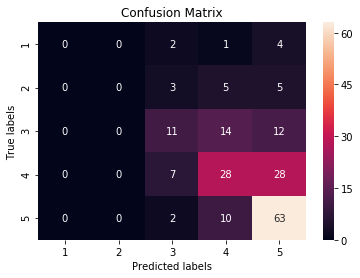


AdaBoost  Accuracy Score:  0.3435897435897436

Plotting the confusion matrix to observe which data points are incorrectly classified



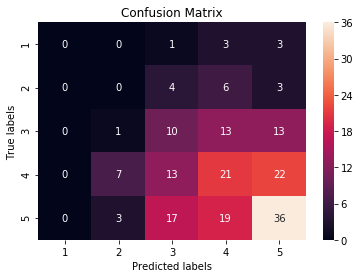

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



XGBoost  Accuracy Score:  0.4564102564102564

Plotting the confusion matrix to observe which data points are incorrectly classified



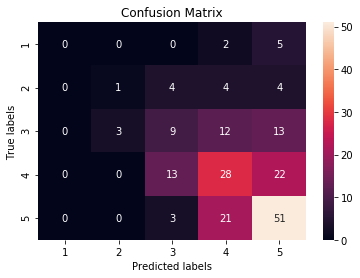


Voting Classifier with hard voting:

Accuracy Score of Voting Classifier:  0.5230769230769231

Plotting the confusion matrix to observe which data points are incorrectly classified



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


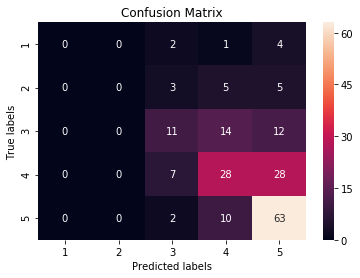

In [93]:
classifier_train_predict(X_train_selected, y_train, X_test_selected, y_test)

votingClassifier(X_train_selected, y_train, X_test_selected, y_test)

## HYPERPARAMETER TUNING

The hyperparameters of a model can be tuned by development set. GridSearchCV (Cross Validation algorithm) is used for hyperparameter tuning. The performance of the model using various C and Gamma values is measured and the best parameter is returned. These parameter helps to tune the model and increase the accuracy of predicrion
<br>

In [94]:
def svc_param_selection(X, y, nfolds):
    print('Using GridSearchCV for tuning the hyperparameters...')
    print()
    print('This might take some time (approx 5-10 mins)...')
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = {'C': C_range, 'gamma' : gamma_range}
    model = svm.SVC(kernel = 'rbf')
    grid_search = GridSearchCV(model, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print("Best Params")
    print(grid_search.best_params_)
    return grid_search.best_params_

In [95]:
def tuneSVC(X_train_selected, y_train, X_test_selected, y_test):
    print()
    print('SVC gives better accuracy as compared to other classifiers, tuning hyperparameters of SVC...')
    param = svc_param_selection(X_train_selected, y_train, 3)
    model = svm.SVC(C=param['C'], kernel= 'rbf', gamma=param['gamma'])
    model = model.fit(X_train_selected, y_train)
    predicted = model.predict(X_test_selected)
    print()
    print("Accuracy Score of SVC with hyperparameters tuned: ",accuracy_score(y_test, predicted))
    cnf_matrix = confusion_matrix(y_test, predicted)
    print()
    plotConfusionMatrix(cnf_matrix, 'Tuned SVC')



SVC gives better accuracy as compared to other classifiers, tuning hyperparameters of SVC...
Using GridSearchCV for tuning the hyperparameters...

This might take some time (approx 5-10 mins)...
Best Params
{'C': 1.0, 'gamma': 0.01}

Accuracy Score of SVC with hyperparameters tuned:  0.5282051282051282

Plotting the confusion matrix to observe which data points are incorrectly classified



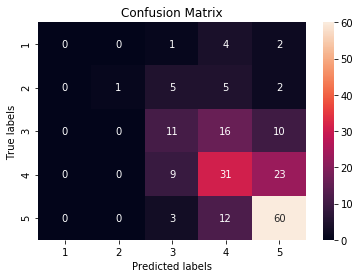

In [96]:
tuneSVC(X_train_selected, y_train, X_test_selected, y_test)